# 2D transzformációk

_Tartalom_: lineáris és homgén transzformációk pyhonban

_Szükséges előismereketek_: python, matplotlib, numpy, opencv, lineáris algebra 


Kiindulásképp rajzoljunk ki pár koordinátát:

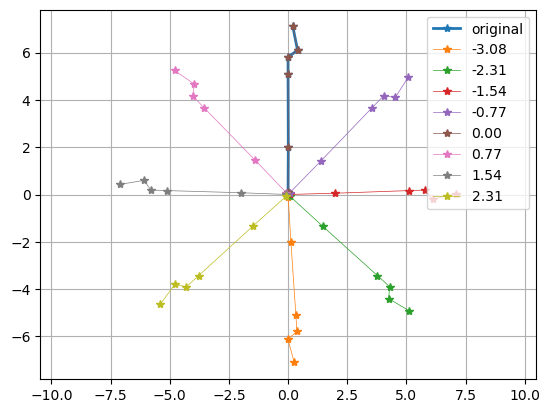

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# matrix multiplication (dot product) version
def rotate_xy_mtx(xy_arr, yaw_so):
    tf = np.array([[np.cos(yaw_so), np.sin(yaw_so)], [-np.sin(yaw_so), np.cos(yaw_so)]])
    xy_arr = np.dot(xy_arr, tf)
    return xy_arr

# no matrix multiplication version
def rotate_xy_no_mtx(xy_arr, yaw_so):
    rot_sin = np.sin(yaw_so)
    rot_cos = np.cos(yaw_so)
    x_arr = xy_arr[:, 0]
    y_arr = xy_arr[:, 1]
    for i in range(len(x_arr)):
        x_pos = x_arr[i]
        y_pos = y_arr[i]
        x_arr[i] = x_pos * rot_cos - y_pos * rot_sin
        y_arr[i] = x_pos * rot_sin + y_pos * rot_cos
    return np.array([x_arr, y_arr]).T

def plot_xy(xy_arr, width_=0.5, label_="none"):
    plt.plot(xy_arr[:, 0], xy_arr[:, 1], "*-", label=label_, linewidth=width_)
    plt.grid(True)
    plt.axis("equal")
    plt.legend()



resolution = 1.3 # 5.0
a0 = np.array([[0.0, 0.1], [0.01, 2], [0, 5.1], [0, 5.8], [0.4, 6.1], [0.2, 7.1],])
plot_xy(a0, label_="original", width_=2)
for i in range(int(-1.0*np.pi* resolution), int(1.0*np.pi*resolution)):
    angle = i / resolution
    a0 = np.array([[0.0, 0.1], [0.01, 2], [0, 5.1], [0, 5.8], [0.4, 6.1], [0.2, 7.1],])
    plot_xy(rotate_xy_mtx(a0, angle), label_="%.2f" % (angle) )
plt.show()

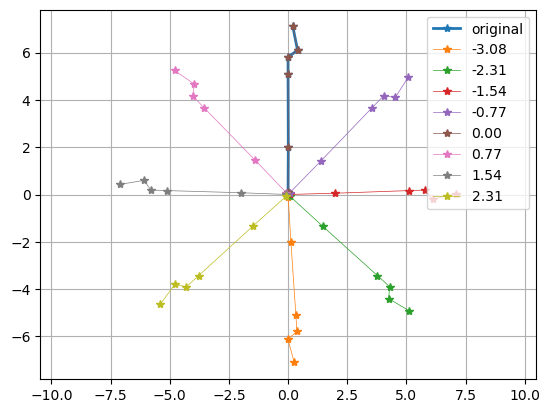

In [2]:
resolution = 1.3 # 5.0
a0 = np.array([[0.0, 0.1], [0.01, 2], [0, 5.1], [0, 5.8], [0.4, 6.1], [0.2, 7.1],])
plot_xy(a0, label_="original", width_=2)
for i in range(int(-1.0*np.pi* resolution), int(1.0*np.pi*resolution)):
    angle = i / resolution
    a0 = np.array([[0.0, 0.1], [0.01, 2], [0, 5.1], [0, 5.8], [0.4, 6.1], [0.2, 7.1],])
    plot_xy(rotate_xy_no_mtx(a0, angle), label_="%.2f" % (angle) )
plt.show()